# Project # 3
## Overview:

## Objective: Develop a model to predict whether a customer will churn (leave the service) based on their usage patterns and demographics.

### Description:
This project uses a dataset containing customer information and usage data to train a model that can predict the likelihood of customer churn. The key steps include data cleaning and preprocessing (e.g., handling missing values, encoding categorical variables), exploratory data analysis (EDA) to identify key features, feature engineering, model selection and training (e.g., logistic regression, random forests), and model evaluation.

### Dataset:
The dataset provides a comprehensive overview of customer interactions with an online retail store, including data on customer demographics, spending behavior, satisfaction levels, and engagement with marketing campaigns. The data is taken form kiggle website.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

## Loading and Inspecting the Data

In [2]:
df = pd.read_csv('online_retail_customer_churn.csv')

In [3]:
df.head()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Annual_Income               1000 non-null   float64
 4   Total_Spend                 1000 non-null   float64
 5   Years_as_Customer           1000 non-null   int64  
 6   Num_of_Purchases            1000 non-null   int64  
 7   Average_Transaction_Amount  1000 non-null   float64
 8   Num_of_Returns              1000 non-null   int64  
 9   Num_of_Support_Contacts     1000 non-null   int64  
 10  Satisfaction_Score          1000 non-null   int64  
 11  Last_Purchase_Days_Ago      1000 non-null   int64  
 12  Email_Opt_In                1000 non-null   bool   
 13  Promotion_Response          1000 n

## Handling Missing and Duplicate Values:

In [5]:
df.isnull().sum()

Customer_ID                   0
Age                           0
Gender                        0
Annual_Income                 0
Total_Spend                   0
Years_as_Customer             0
Num_of_Purchases              0
Average_Transaction_Amount    0
Num_of_Returns                0
Num_of_Support_Contacts       0
Satisfaction_Score            0
Last_Purchase_Days_Ago        0
Email_Opt_In                  0
Promotion_Response            0
Target_Churn                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

## Summary Statistic:

In [7]:
df.describe()

,Customer_ID,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.267000,111.962960,5080.79265,9.727000,49.456000,266.876530,4.612000,1.934000,2.974000,182.890000
std,288.819436,15.242311,52.844111,2862.12335,5.536346,28.543595,145.873445,2.896869,1.402716,1.391855,104.391319
min,1.000000,18.000000,20.010000,108.94000,1.000000,1.000000,10.460000,0.000000,0.000000,1.000000,1.000000
25%,250.750000,30.000000,67.800000,2678.67500,5.000000,25.000000,139.682500,2.000000,1.000000,2.000000,93.000000
50%,500.500000,43.000000,114.140000,4986.19500,9.000000,49.000000,270.100000,5.000000,2.000000,3.000000,180.500000
75%,750.250000,56.000000,158.452500,7606.47000,14.000000,74.000000,401.602500,7.000000,3.000000,4.000000,274.000000
max,1000.000000,69.000000,199.730000,9999.64000,19.000000,99.000000,499.570000,9.000000,4.000000,5.000000,364.000000


## Interpretation: 

The dataset has no missing and duplicate values.

**Summary of the table:**

- **Age**: Customers range from 18 to 69 years old, which is a typical age distribution.
- **Annual Income**: The income spans from $20.01k to $199.73k, covering a broad spectrum of financial backgrounds.
- **Total Spend**: Spending varies widely from $108.94 to $9999.64, reflecting diverse purchasing behaviors.
- **Years as Customer**: Customers have been with the company for 1 to 19 years, indicating a mix of new and long-term customers.
- **Number of Purchases**: Purchase counts range from 1 to 99, showing different levels of shopping activity.
- **Average Transaction Amount**: Transactions average between $10.46 and $499.57, with no extreme outliers.
- **Number of Returns**: Returns range from 0 to 9, which is within a normal range.
- **Number of Support Contacts**: Support interactions range from 0 to 4, suggesting varying levels of customer service needs.
- **Satisfaction Score**: Scores range from 1 to 5, as expected for a satisfaction metric.
- **Last Purchase Days Ago**: The days since the last purchase range from 1 to 364, indicating a wide range of recent activity.

### Categorical vs Numerical Variables

In [8]:
# Categorical columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

# Numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

## Univariate Analysis

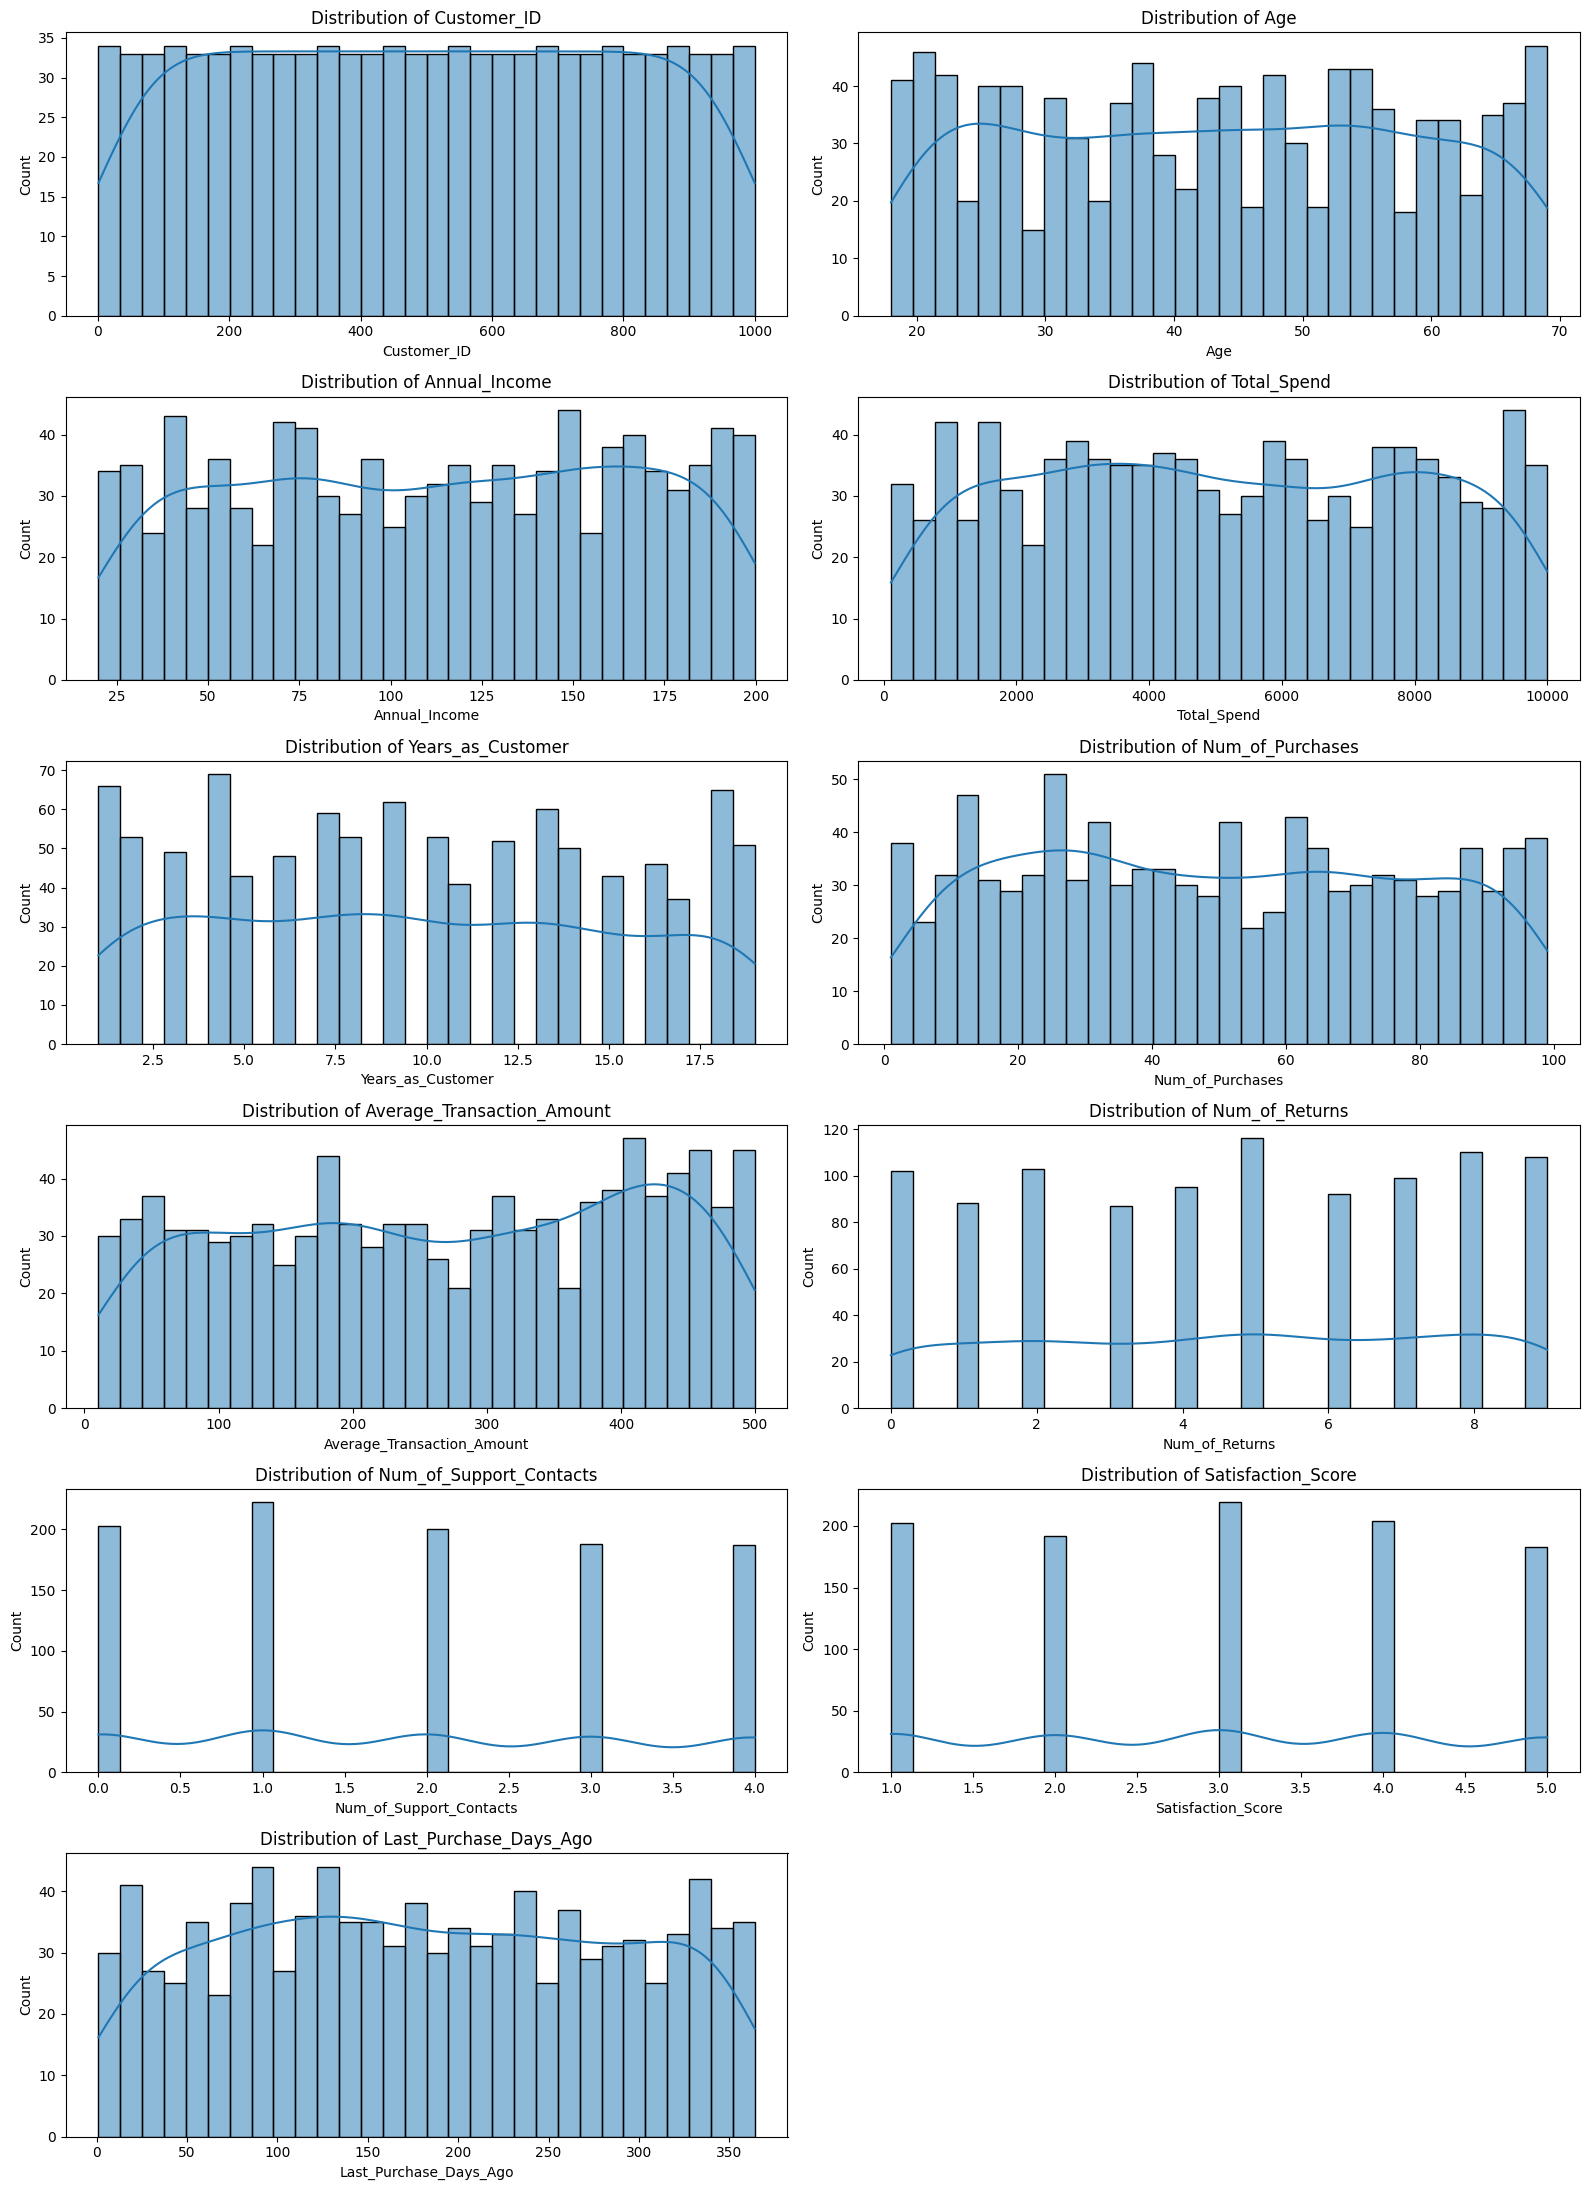

In [9]:
# Histograms
# Create subplots with 2 columns
fig, axes = plt.subplots(nrows=(len(numerical_cols) + 1) // 2, ncols=2, figsize=(16, len(numerical_cols) * 2))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each numerical column
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Hide any unused subplots
for ax in axes[len(numerical_cols):]:
    ax.remove()

# Adjust layout
plt.tight_layout()
plt.show()


### Interpretation:
The numerical variables are not Normally distribution.

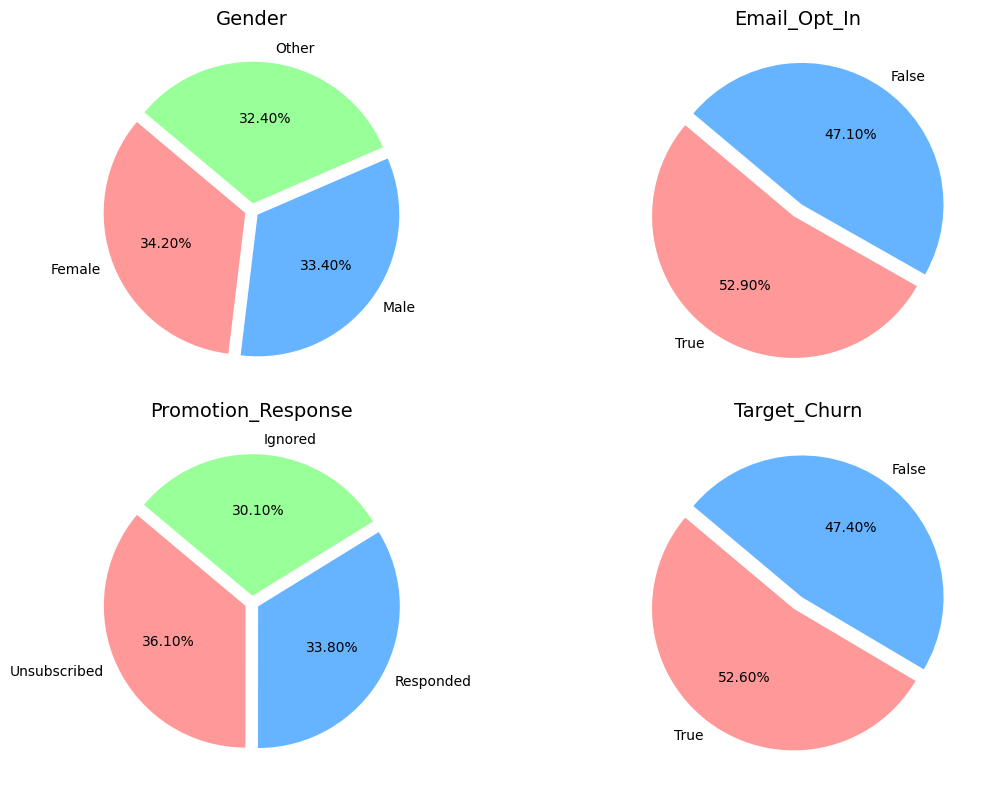

In [10]:
#Pie chart
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Custom colors for pie charts
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Loop over the grid to create pie charts
for i in range(2):
    for j in range(2):
        # Get the value counts of the current categorical variable
        counts = df[categorical_cols[i*2 + j]].value_counts()
        
        # Create a pie chart with additional customizations
        axes[i][j].pie(counts, autopct="%0.2f%%", labels=counts.index, colors=colors, startangle=140, 
                       explode=[0.05]*len(counts))
        
        # Set title for the pie chart
        axes[i][j].set_title(categorical_cols[i*2 + j], fontsize=14)

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()


## Bivariate Analysis

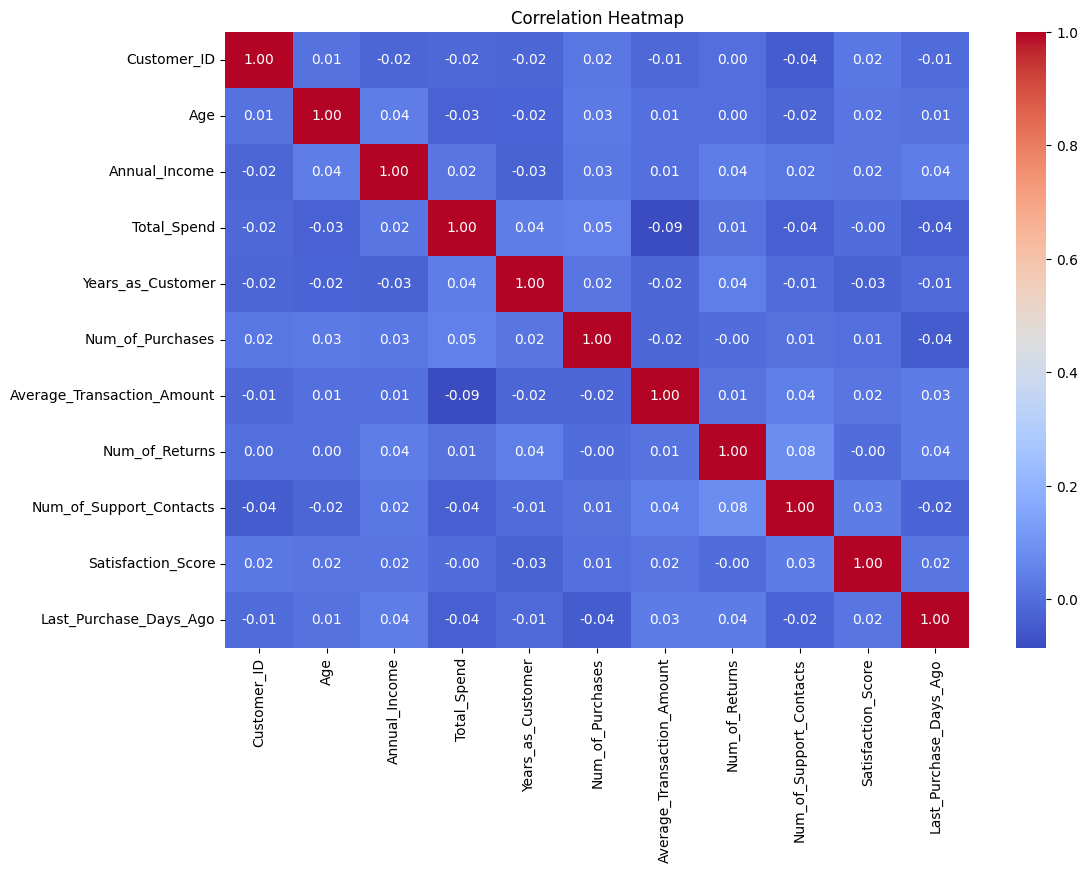

In [11]:
# Correlation heatmap
# Select only the numeric columns from the DataFrame
numeric_cols = df.select_dtypes(include=['number']).columns

# Compute the correlation matrix using only numeric columns
corr_matrix = df[numeric_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Interpretation:
The correlation matrix indicates that there are no particularly high correlations (close to 1 or -1) between any pair of numerical variables. This suggests that multicollinearity is likely not a significant concern among the variables.

## Feature Engineering

In [12]:
df.head()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


In [13]:
df.drop(columns='Customer_ID', inplace = True)

Here all the Categorical columns is Labeled data so we have to use label encoder

In [14]:
le = LabelEncoder()
for i in categorical_cols:
    df[i] = le.fit_transform(df[i])

In [15]:
df.head()

,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,62,2,45.15,5892.58,5,22,453.80,2,0,3,129,1,1,1
1,65,1,79.51,9025.47,13,77,22.90,2,2,3,227,0,1,0
2,18,1,29.19,618.83,13,71,50.53,5,2,2,283,0,1,1
3,21,2,79.63,9110.30,3,33,411.83,5,3,5,226,1,0,1
4,21,2,77.66,5390.88,15,43,101.19,3,0,5,242,0,2,0


In [16]:
# Separate input features (X) and target variable (y)
X = df.drop(columns=['Target_Churn'])  # Input features
y = df['Target_Churn']  # Target variable

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 42)

## Predictive Models

In [18]:
# Import all the Models 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix,f1_score,recall_score

In [19]:
lr  = LogisticRegression()
rfc = RandomForestClassifier()

In [20]:
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
print(accuracy_score(y_test,lr_pred))
print(precision_score(y_test,lr_pred))
print(confusion_matrix(y_test,lr_pred))

0.52
0.5342465753424658
[[26 68]
 [28 78]]


c:\Users\Naveed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
print(accuracy_score(y_test,rfc_pred))
print(precision_score(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

0.525
0.5401459854014599
[[31 63]
 [32 74]]


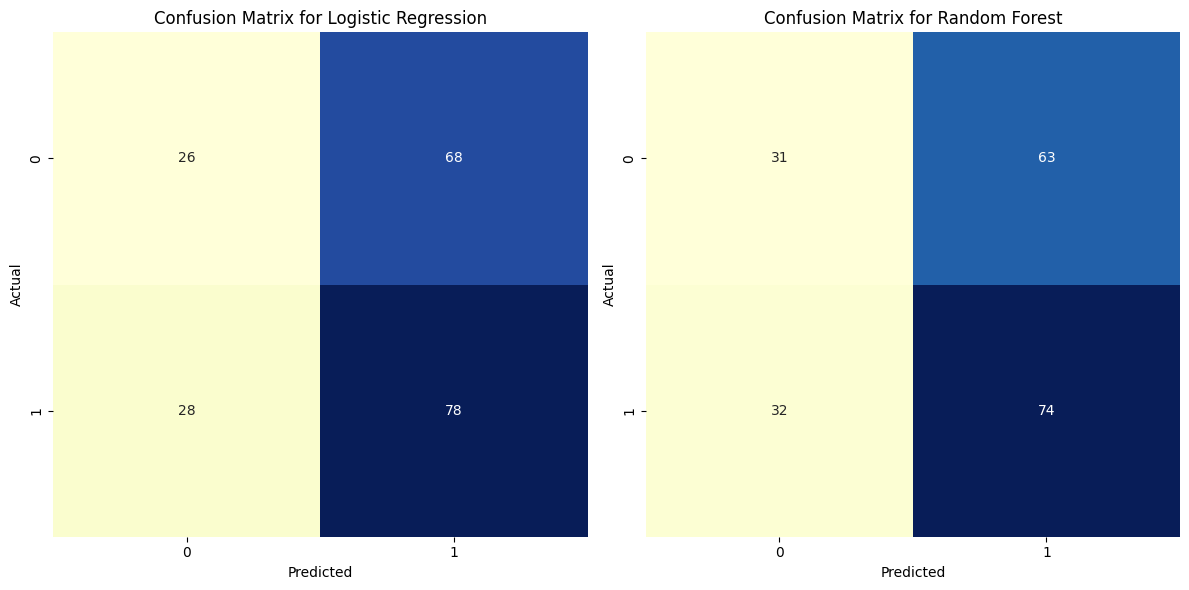

In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Plot confusion matrix for each model
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Increased figure size for better visibility
axes = axes.flatten()

models = ['Logistic Regression', 'Random Forest']
predictions = [lr_pred, rfc_pred]  # Ensure these variables are defined

for ax, model, pred in zip(axes, models, predictions):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='YlGnBu', cbar=False)  # Changed color map
    ax.set_title(f'Confusion Matrix for {model}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


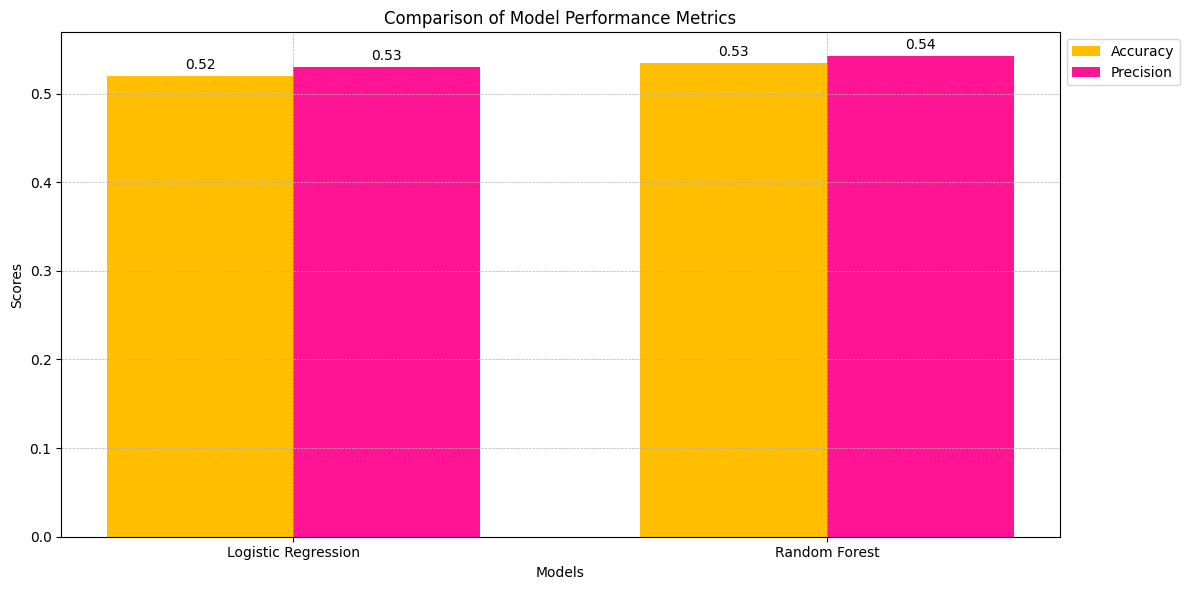

In [23]:
# Data
metrics = ['Accuracy', 'Precision']
models = ["Logistic Regression", 'Random Forest']
values = np.array([
    
    [0.520, 0.534],  # Accuracy for each model
    [0.530, 0.542]   # Precision for each model
])

# Colors
colors = ['#FFBF00', '#FF1493']  # Colors used in the previous plot

# Plotting
x = np.arange(len(models))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(12, 6))  # Increased figure size for better visibility

# Plot each metric as a group of bars
for i, (metric, color) in enumerate(zip(metrics, colors)):
    bars = ax.bar(x + i * width, values[i], width, label=metric, color=color)
    # Add text annotations on top of the bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)  # Adjusted font size for readability

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance Metrics')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(models)

# Move legend outside
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add dashed grid lines
ax.yaxis.grid(True, linestyle='--', linewidth=0.5)
ax.xaxis.grid(True, linestyle='--', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()


## Conclusion:
The evaluation of the predictive models for customer churn reveals that the Random Forest model slightly outperforms the Logistic Regression model. Specifically, Random Forest achieved an accuracy of 0.530 and a precision of 0.542, compared to Logistic Regression’s accuracy of 0.520 and precision of 0.534. This indicates that Random Forest is marginally better at correctly identifying customers who are likely to churn while reducing false positives. Given the comprehensive nature of the dataset, which includes key features such as customer demographics, spending behavior, satisfaction levels, and marketing engagement, the Random Forest model's superior performance suggests it may be more effective for this task. To further improve predictive accuracy and precision, additional optimization, feature engineering, and exploration of advanced ensemble methods are recommended. Overall, the Random Forest model provides a slightly better tool for identifying at-risk customers and supporting targeted retention strategies.